# Project Title: Car Price Prediction Model
- Aim :  In this project we will take a raw Car dataset from kaggle and perform Exploratory Data Analysis to know more about the dataset, the relations between features and also handle missing values. After that we will perform Feature Engineering. As our dataset has multiple feature features so we will perform One Hot Encoding to make the dataset more Machine Learning Model friendly. 

# Step 1 EDA 
- we will perform Exploratory Data Analysis to know more about the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
Data = pd.read_csv("Cars.csv", encoding="latin1")
Data

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm


- Checking Is there Any Null Values are present or not

In [3]:
Data.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

### Now we will see how many categorical features are there and how many numerical features are there


In [4]:
numeric_features = [feature for feature in Data.columns if Data[feature].dtype != 'O']
print(numeric_features)


[]


### As we can see that in this dataset we have both Categorical and numerical features but numerical features are read as Object class becuase there are units in every column.
- So We first convert HorsePower Column into numeric and it's unit will be kept into another column Name HorsePower_Unit

In [5]:
Data['HorsePower'].unique()[:50]

array(['963 hp', '563 hp', '70-85 hp', '630 hp', '602 hp', '710 hp',
       '656 hp', '550 hp', '750 hp', '789 hp', '592 hp', '612 hp',
       '382 hp', '205 hp', '228 hp', '381 hp', '600 hp', '332 hp',
       '400 hp', '188 hp', '300 hp', '149 hp', '201 hp', '284 hp',
       '310 hp', '1160 hp', '1000 hp', '715 hp', '503 hp', '542 hp',
       '580 hp', '540 hp', '836 hp', '819 hp', '759 hp', '640 hp',
       '740 hp', '641 hp', '610 hp', '700 hp', '769 hp', '671 hp',
       '591 hp', '624 hp', '496 hp', '603 hp', '429 hp', '362 hp',
       '416 hp', '402 hp'], dtype=object)

In [6]:
Data['HorsePower_Unit'] = Data['HorsePower'].str.extract(r'([a-zA-Z]+)')

In [7]:
Data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,HorsePower_Unit
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm,hp
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm,hp
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm,hp
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm,hp
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm,hp


In [8]:
Data['HorsePower'].dtype

dtype('O')

In [9]:
Data['HorsePower'] = Data['HorsePower'].str.extract(r'(\d{1,3}(?:,\d{3})*|\d+\.?\d*)')
Data['HorsePower'] = Data['HorsePower'].replace(',', '', regex = True).astype(float)


In [10]:
Data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,HorsePower_Unit
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm,hp
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm,hp
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.0,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm,hp
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.0,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm,hp
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.0,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm,hp


## We checked that our strategy is working with HorsePower feature and we successfully convert it into numerical column and now:
- We are going to do the same for each numerical features

In [11]:
Num_with_units = [
    'CC/Battery Capacity',
    'Total Speed',
    'Performance(0 - 100 )KM/H',
    'Cars Prices',
    'Seats',
    'Torque'
]
def split_numeric_and_units(Data, column):
    Data[column + '_Unit'] = Data[column].str.extract(r'([a-zA-Z$]+)')
    Data[column] = Data[column].str.extract(r'(\d{1,3}(?:,\d{3})*|\d+\.?\d*)')
    Data[column] = Data[column].replace(',', '', regex = True).astype(float)
    return Data

for column in Num_with_units:
    Data = split_numeric_and_units(Data, column)


In [12]:
Data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,HorsePower_Unit,CC/Battery Capacity_Unit,Total Speed_Unit,Performance(0 - 100 )KM/H_Unit,Cars Prices_Unit,Seats_Unit,Torque_Unit
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,hp,cc,km,sec,$,NaN,Nm
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,hp,cc,km,sec,$,NaN,Nm
2,Ford,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,hp,cc,km,sec,$,NaN,Nm
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,hp,cc,km,sec,$,NaN,Nm
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,hp,cc,km,sec,$,NaN,Nm


In [13]:
Data.drop(columns=['Seats_Unit'], inplace=True)

### Now we check again if there are any missing values
- First we check in Categorical features

In [14]:
features_na = [feature for feature in Data.columns if Data[feature].isnull().sum() > 1 and Data[feature].dtype == 'O']
for feature in features_na:
    print('{}: {} % Missing Values are present'.format(feature, np.round(Data[feature].isnull().mean(), 5)))

CC/Battery Capacity_Unit: 0.00411 % Missing Values are present
Performance(0 - 100 )KM/H_Unit: 0.04516 % Missing Values are present


- Now we will check in Numerical features

In [15]:
NumericFeatures_na = [feature for feature in Data.columns if Data[feature].isnull().sum() > 1 and Data[feature].dtype != 'O']
for feature in NumericFeatures_na:
    print('{}: {} % Missing Values are present'.format(feature, np.round(Data[feature].isnull().mean(), 4)))

CC/Battery Capacity: 0.0041 % Missing Values are present
Performance(0 - 100 )KM/H: 0.0049 % Missing Values are present


### The missing value's percentage is very very low . It's mean that our dataset is having ~0.005% missing values. 
- Let's see those rows 

In [16]:
num_features_with_na = ['CC/Battery Capacity', 'Performance(0 - 100 )KM/H']
Missing_rows = Data[Data[num_features_with_na].isnull().any(axis = 1)]
Missing_rows

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,HorsePower_Unit,CC/Battery Capacity_Unit,Total Speed_Unit,Performance(0 - 100 )KM/H_Unit,Cars Prices_Unit,Torque_Unit
97,MERCEDES,BENZ EQS 53,ELECTRIC MOTOR,NaN,751.0,250.0,3.0,102000.0,Electric,5.0,950.0,hp,NaN,km,sec,$,Nm
241,TOYOTA,COASTER,"4.0L,DIESEL",4009.0,134.0,120.0,NaN,70000.0,Diesel,20.0,500.0,hp,cc,km,NaN,$,Nm
255,Nissan,Urvan,2.5L Turbo Diese,NaN,248.0,140.0,14.0,28000.0,Diesel,15.0,356.0,cc,NaN,km,sec,$,Nm
994,Peugeot,Partner Electric,Electric Motor,NaN,136.0,130.0,9.0,40000.0,Electric,5.0,260.0,hp,NaN,km,sec,$,Nm
995,Peugeot,Expert Electric,Electric Motor,NaN,136.0,130.0,9.0,45000.0,Electric,5.0,260.0,hp,NaN,km,sec,$,Nm
1096,Mitsubishi,Canter (Truck),3.0L Diesel,3000.0,150.0,120.0,NaN,35000.0,Diesel,2.0,370.0,hp,cc,km,NaN,$,Nm
1107,Mitsubishi,Fuso Fighter (Truck),7.5L Diesel,7500.0,240.0,120.0,NaN,70000.0,Diesel,2.0,686.0,hp,cc,km,NaN,$,Nm
1108,Mitsubishi,Fuso Canter Eco Hybrid,3.0L Diesel Hybrid,3000.0,150.0,120.0,NaN,50000.0,Diesel Hybrid,2.0,370.0,hp,cc,km,NaN,$,Nm
1126,Mitsubishi,Minicab MiEV,Electric Motor,16.0,64.0,100.0,NaN,18000.0,Electric,2.0,196.0,hp,kWh,km,NaN,$,Nm
1147,Mazda,RX-Vision Concept,Rotary SkyActiv-R,NaN,400.0,300.0,NaN,NaN,Petrol (Hybrid),2.0,NaN,hp,NaN,km,NaN,N,NaN


In [17]:
missing_rows_all = Data[Data.isnull().any(axis=1)]
missing_rows_all

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,HorsePower_Unit,CC/Battery Capacity_Unit,Total Speed_Unit,Performance(0 - 100 )KM/H_Unit,Cars Prices_Unit,Torque_Unit
97,MERCEDES,BENZ EQS 53,ELECTRIC MOTOR,NaN,751.0,250.0,3.0,102000.0,Electric,5.0,950.0,hp,NaN,km,sec,$,Nm
241,TOYOTA,COASTER,"4.0L,DIESEL",4009.0,134.0,120.0,NaN,70000.0,Diesel,20.0,500.0,hp,cc,km,NaN,$,Nm
255,Nissan,Urvan,2.5L Turbo Diese,NaN,248.0,140.0,14.0,28000.0,Diesel,15.0,356.0,cc,NaN,km,sec,$,Nm
549,Porsche,911 Carrera S,3.0L Twin-Turbo Flat-6,298.0,443.0,308.0,3.0,131300.0,Petrol,4.0,528.0,hp,cc,km,NaN,$,Nm
550,Porsche,911 Carrera 4,3.0L Twin-Turbo Flat-6,298.0,379.0,293.0,4.0,106500.0,Petrol,4.0,450.0,hp,cc,km,NaN,$,Nm
551,Porsche,911 Carrera 4S,3.0L Twin-Turbo Flat-6,298.0,443.0,306.0,3.0,113300.0,Petrol,4.0,528.0,hp,cc,km,NaN,$,Nm
552,Porsche,911 Targa 4,3.0L Twin-Turbo Flat-6,298.0,379.0,289.0,4.0,121300.0,Petrol,4.0,450.0,hp,cc,km,NaN,$,Nm
553,Porsche,911 Turbo,3.8L Twin-Turbo Flat-6,374.0,572.0,320.0,2.0,197200.0,Petrol,4.0,750.0,hp,cc,km,NaN,$,Nm
554,Porsche,911 Turbo S,3.8L Twin-Turbo Flat-6,374.0,640.0,330.0,2.0,230400.0,Petrol,4.0,800.0,hp,cc,km,NaN,$,Nm
555,Porsche,911 GT3,4.0L Naturally Aspirated Flat-6,399.0,502.0,318.0,3.0,161100.0,Petrol,2.0,469.0,hp,cc,km,NaN,$,Nm


## As we can see for the numerical feature i am having 10 rows with NaN values in 'CC/Battery Capacity'and 'Performance(0 - 100 )KM/H' features. And for Categorical feature i am having a lots of rows with NaN value in This feature - Performance(0 - 100 )KM/H_Unit.
- So we will replace them with respective values

In [18]:
Data['Performance(0 - 100 )KM/H_Unit'].fillna('sec', inplace = True)

C:\Users\91707\AppData\Local\Temp\ipykernel_19184\1432409110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Performance(0 - 100 )KM/H_Unit'].fillna('sec', inplace = True)


In [19]:
Data['Cars Prices_Unit'].fillna('$', inplace=True)

C:\Users\91707\AppData\Local\Temp\ipykernel_19184\2293001378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Cars Prices_Unit'].fillna('$', inplace=True)


In [20]:
Data['CC/Battery Capacity_Unit'] = Data['CC/Battery Capacity_Unit'].fillna(
    Data['Fuel Types'].apply(lambda x: 'kWh' if x == 'Electric' else 'cc')
    )

In [21]:
Data['Torque_Unit'].fillna('Nm', inplace=True)

C:\Users\91707\AppData\Local\Temp\ipykernel_19184\3422524378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Torque_Unit'].fillna('Nm', inplace=True)


In [22]:
for col in num_features_with_na:
    Data[col].fillna(Data[col].mean(), inplace=True)


C:\Users\91707\AppData\Local\Temp\ipykernel_19184\1593928119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data[col].fillna(Data[col].mean(), inplace=True)


In [23]:
Data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,HorsePower_Unit,CC/Battery Capacity_Unit,Total Speed_Unit,Performance(0 - 100 )KM/H_Unit,Cars Prices_Unit,Torque_Unit
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,hp,cc,km,sec,$,Nm
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,hp,cc,km,sec,$,Nm
2,Ford,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,hp,cc,km,sec,$,Nm
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,hp,cc,km,sec,$,Nm
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,hp,cc,km,sec,$,Nm


## Let's Find some Relationship between Features Through Visualization 


Text(0, 0.5, 'Mean Cars Prices')

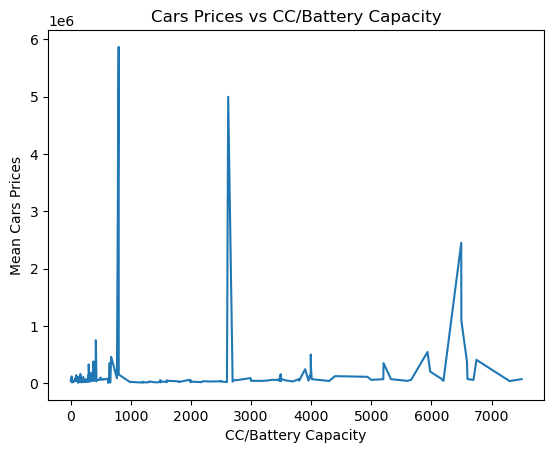

In [24]:
Data.groupby('CC/Battery Capacity')['Cars Prices'].mean().plot()
plt.title('Cars Prices vs CC/Battery Capacity')
plt.xlabel('CC/Battery Capacity')
plt.ylabel('Mean Cars Prices')


## A lot of cars share exactly the same engine capacity (like 1998 cc, 2999 cc, 6000 cc — manufacturers love round numbers).

## Within those “capacity buckets,” prices vary wildly depending on brand, luxury tier, and fuel type.

## That’s why moving from a simple lineplot to boxplots / scatterplots with hue (brand or fuel type) will make the relationships much clearer

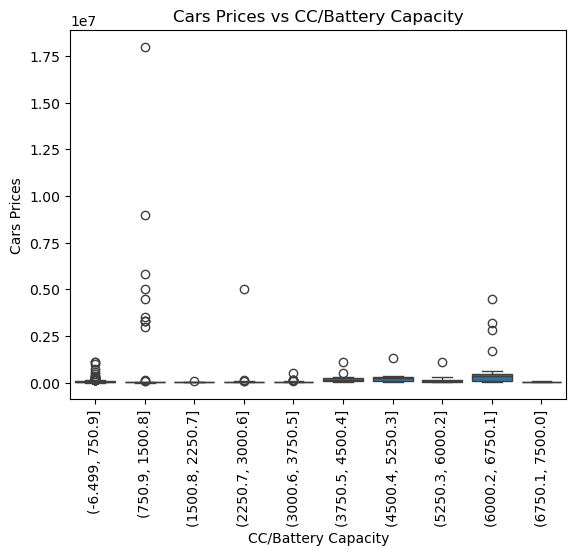

In [25]:
sns.boxplot(x = pd.cut(Data['CC/Battery Capacity'], bins = 10),
            y = Data['Cars Prices'])
plt.xticks(rotation = 90)
plt.title('Cars Prices vs CC/Battery Capacity')
plt.xlabel('CC/Battery Capacity')
plt.ylabel('Cars Prices')
plt.show()

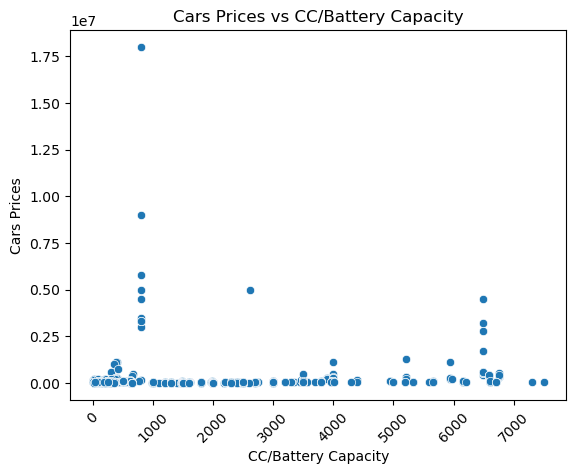

In [26]:
sns.scatterplot(x=Data['CC/Battery Capacity'], y=Data['Cars Prices'])
plt.xticks(rotation=45)
plt.title('Cars Prices vs CC/Battery Capacity')
plt.xlabel('CC/Battery Capacity')
plt.ylabel('Cars Prices')
plt.show()

## Analysis of Cars Prices vs CC/Battery Capacity
- The scatter plot shows the relationship between car prices and the engine/battery capacity.

- The majority of the data points are clustered below a price of $2.5 million, with most cars having a capacity below 2,000 cc.

- There are several outliers with extremely high prices, some of which correspond to higher engine capacities.

- For cars with an engine capacity below 1,000 cc, prices generally remain low, with some notable exceptions reaching up to $1.75 million.

- Above 2,000 cc, there is a large amount of scatter, indicating that a higher engine/battery capacity does not always correlate with a higher price.

- Very high capacities (over 6,000 cc) show a wide range of prices, with some models being among the most expensive in the dataset, while others are priced similarly to cars with much smaller engines.

Text(0, 0.5, 'Mean Cars Prices')

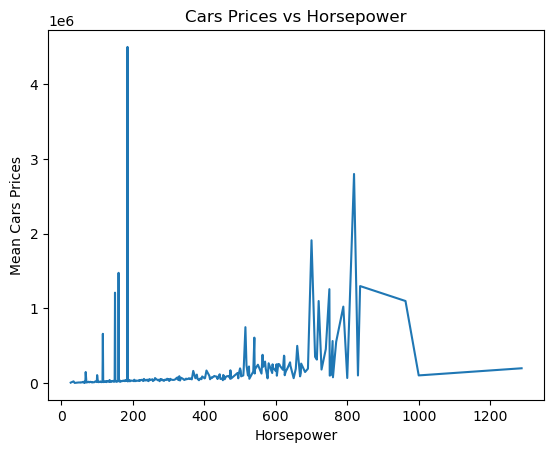

In [27]:
Data.groupby('HorsePower')['Cars Prices'].mean().plot()
plt.title('Cars Prices vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Mean Cars Prices')


## Analysis of Cars Prices vs Horsepower
- The line plot illustrates the average car price as horsepower increases.

- The plot shows a general trend where average car prices tend to rise with an increase in horsepower.

- However, the relationship is not linear; there are significant spikes in price at various horsepower levels, particularly around the 200 hp, 600 hp, and 750 hp marks.

- After around 950 hp, the average car price drops dramatically before starting to rise again, which might be due to a smaller number of data points or different types of vehicles at the very high end of the horsepower spectrum.

In [28]:
Categorical_features = [feature for feature in Data.columns if Data[feature].dtype == 'O']
numeric_features = [feature for feature in Data.columns if Data[feature].dtype != 'O']


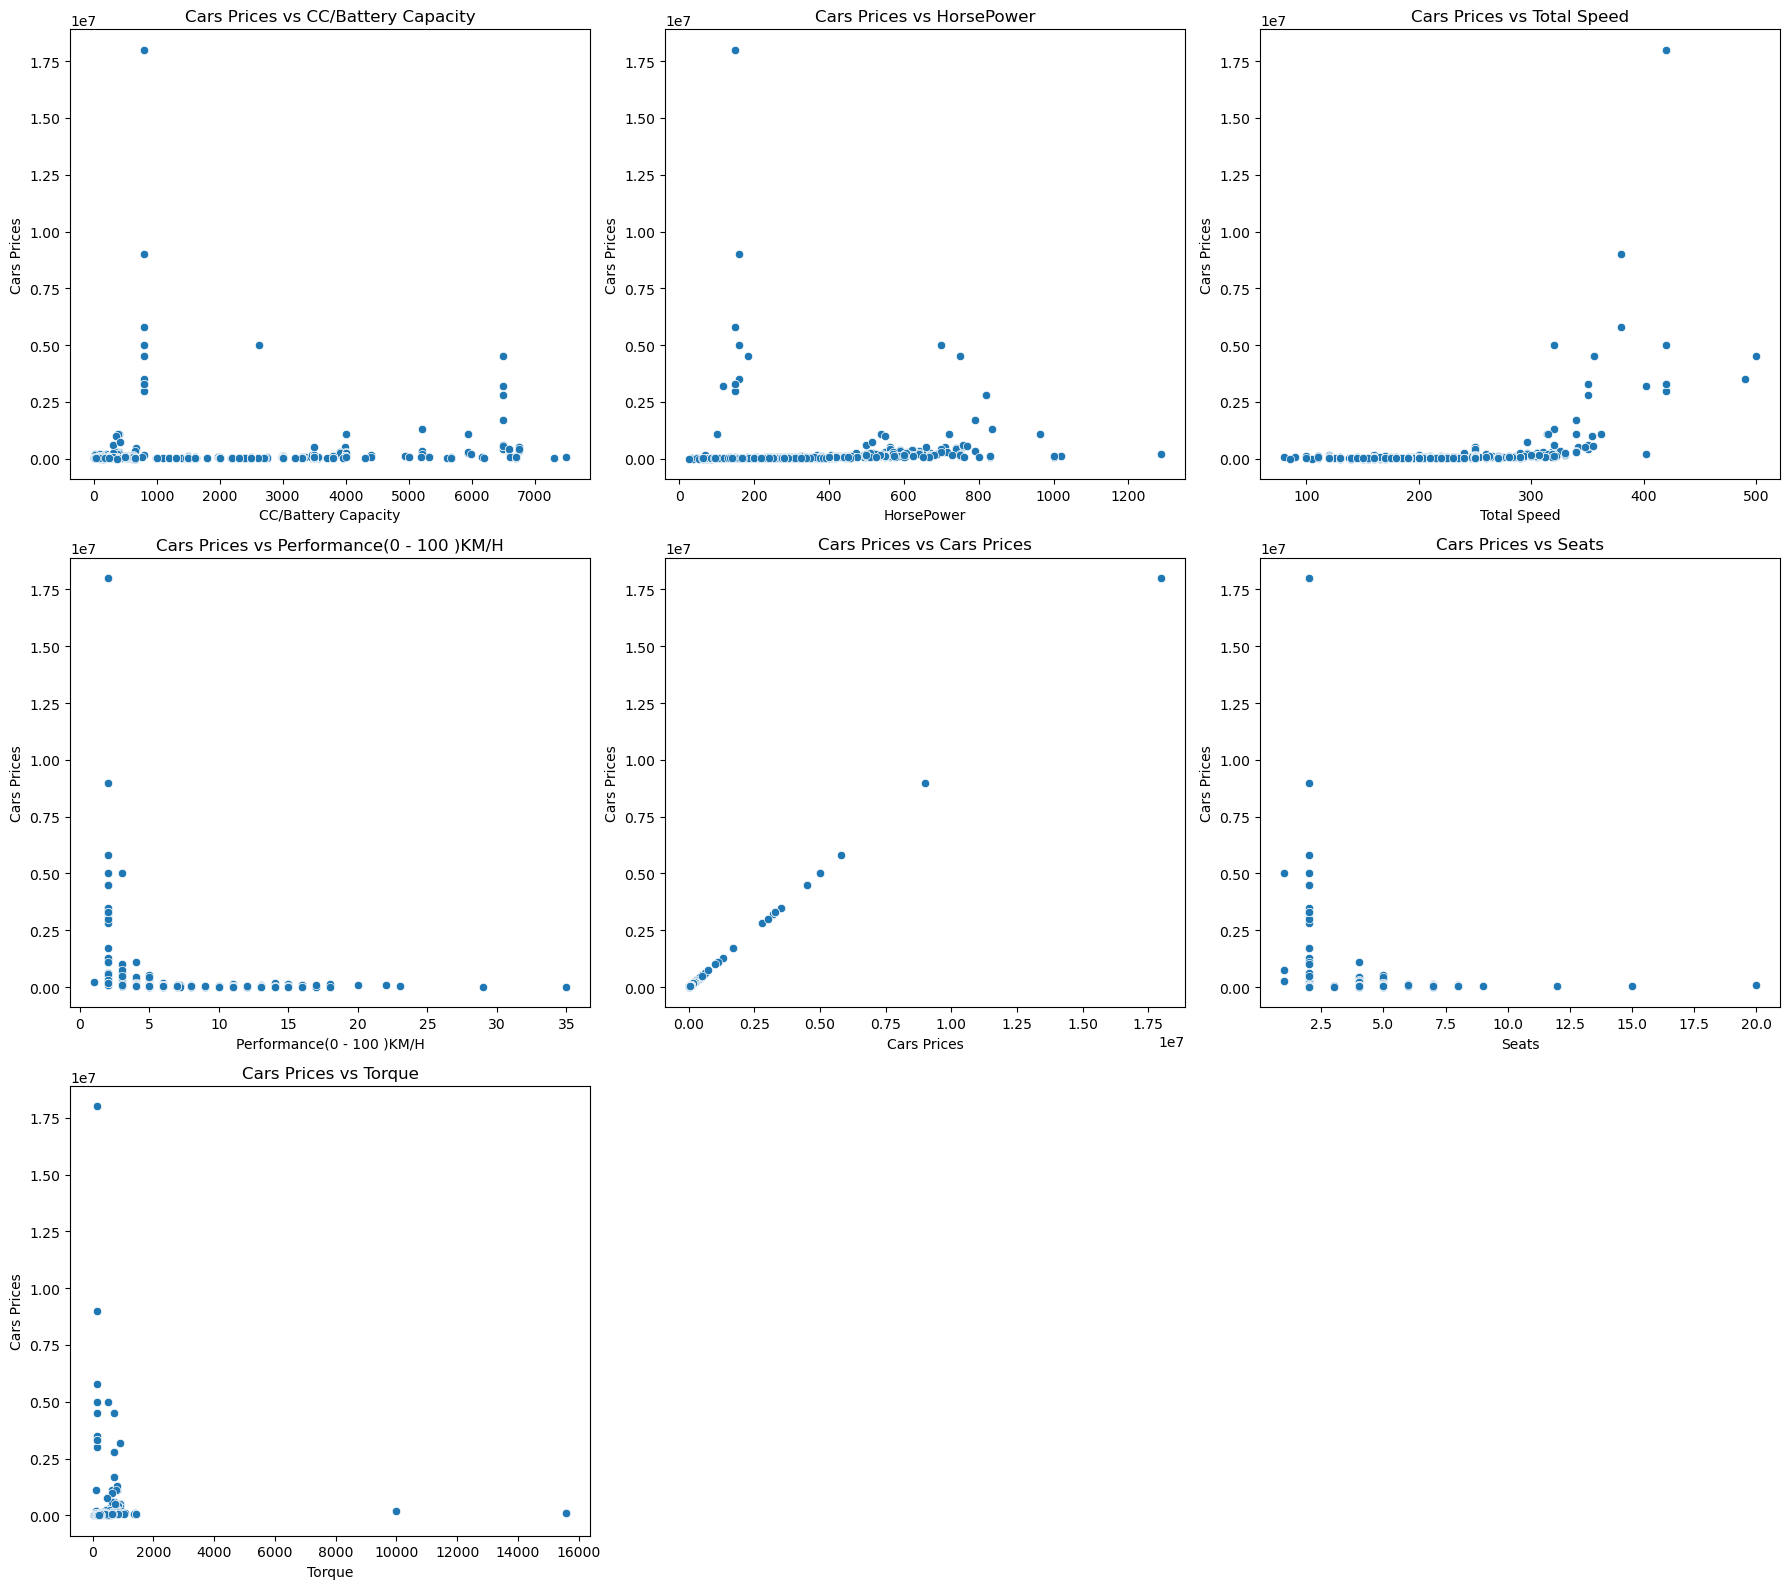

In [29]:
plt.figure(figsize = (18, 16))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=Data, x=feature, y="Cars Prices")
    plt.title(f"Cars Prices vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Cars Prices")

plt.tight_layout()
plt.show()

## Analysis of the Scatter Plots of Numerical Features
- The scatter plots provide a visual representation of the relationships between several numeric features and car prices.

- CC/Battery Capacity vs. Cars Prices: The plot shows a wide distribution of prices, with many cars clustered at lower price points and a few high-priced outliers. There is no clear linear relationship, as prices can vary greatly even within the same capacity range.

- HorsePower vs. Cars Prices: Similar to capacity, this plot shows a general upward trend but also a high degree of variability. High-horsepower cars tend to be more expensive, but there are numerous outliers where high horsepower does not guarantee a high price, and vice versa.

- Total Speed vs. Cars Prices: There appears to be a more direct relationship here, with higher top speeds generally corresponding to higher prices. The data points are mostly grouped at lower speeds and prices, with several expensive, high-speed outliers.

- Performance(0 - 100 )KM/H vs. Cars Prices: This plot shows a clear negative correlation: as the time to accelerate from 0-100 km/h decreases (meaning a faster car), the price tends to increase. The most expensive cars are those with the lowest acceleration times.

- Torque vs. Cars Prices: The relationship between torque and price is not as strong as with horsepower or total speed. While some high-torque cars are expensive, a significant number of vehicles with average torque are also found at various price points.

- Seats vs. Cars Prices: The plot shows that cars with 2 to 7 seats have a wide range of prices. The very high-priced outliers are generally found in the 2, 4, and 5-seater categories, which are typical for high-performance sports cars and luxury sedans.

In [30]:
Data.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque', 'HorsePower_Unit',
       'CC/Battery Capacity_Unit', 'Total Speed_Unit',
       'Performance(0 - 100 )KM/H_Unit', 'Cars Prices_Unit', 'Torque_Unit'],
      dtype='object')

In [31]:
Data['Company Names'].unique()

array(['FERRARI', 'ROLLS ROYCE', 'Ford', 'MERCEDES', 'AUDI', 'BMW',
       'ASTON MARTIN', 'BENTLEY', 'LAMBORGHINI', 'TOYOTA', 'NISSAN',
       'ROLLS ROYCE ', 'VOLVO', 'KIA', 'HONDA', 'KIA  ', 'HYUNDAI',
       'MAHINDRA', 'MARUTI SUZUKI', 'Nissan', 'Volkswagen', 'Porsche',
       'Cadillac', 'Tata Motors', 'Tesla', 'Jeep', 'Mazda', 'Chevrolet',
       'GMC', 'Kia', 'Peugeot', 'Bugatti', 'Volvo', 'Jaguar Land Rover',
       'Acura', 'Mitsubishi', 'Toyota'], dtype=object)

In [32]:
Data['Company Names'] = Data['Company Names'].str.strip().str.upper()
Data['Company Names'].unique()

array(['FERRARI', 'ROLLS ROYCE', 'FORD', 'MERCEDES', 'AUDI', 'BMW',
       'ASTON MARTIN', 'BENTLEY', 'LAMBORGHINI', 'TOYOTA', 'NISSAN',
       'VOLVO', 'KIA', 'HONDA', 'HYUNDAI', 'MAHINDRA', 'MARUTI SUZUKI',
       'VOLKSWAGEN', 'PORSCHE', 'CADILLAC', 'TATA MOTORS', 'TESLA',
       'JEEP', 'MAZDA', 'CHEVROLET', 'GMC', 'PEUGEOT', 'BUGATTI',
       'JAGUAR LAND ROVER', 'ACURA', 'MITSUBISHI'], dtype=object)

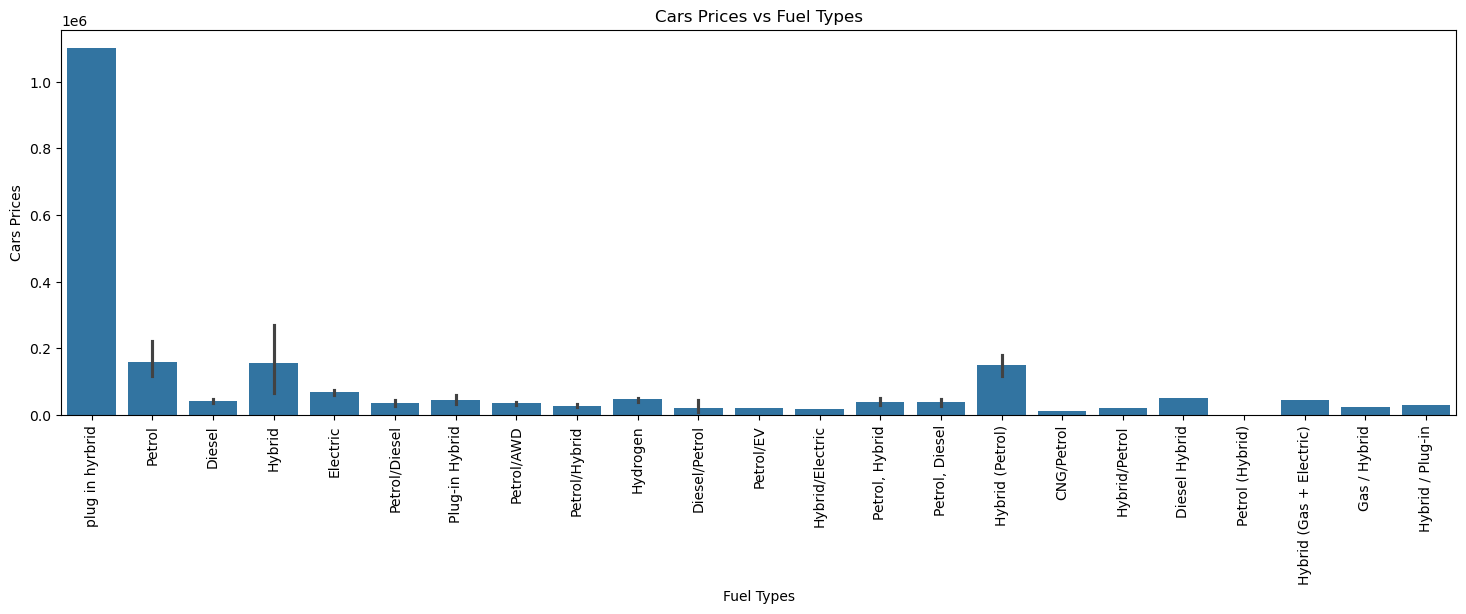

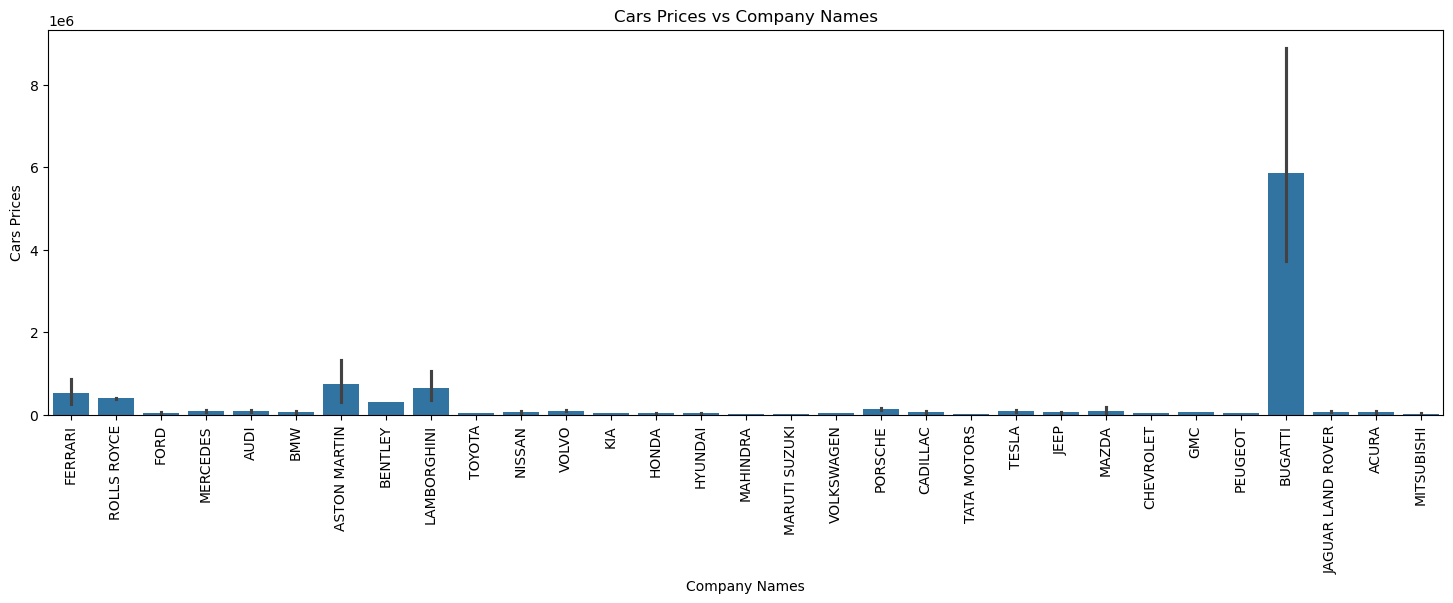

In [33]:
categorical_features = ['Fuel Types', 'Company Names']
for feature in categorical_features:
    plt.figure(figsize = (18, 5))
    sns.barplot(x = feature, y = 'Cars Prices', data = Data)
    plt.title(f'Cars Prices vs {feature}')
    plt.xticks(rotation = 90)    
    plt.show()

## Analysis of Cars Prices vs Fuel Types
- This bar chart shows the average price of a car for each fuel type.

- The plot highlights that "Plug-in Hybrid" vehicles have, on average, the highest price, followed by "Petrol" cars.

- Other fuel types like "Diesel," "Hybrid," and "Electric" have considerably lower average prices.

- The error bars indicate a large variation in price within some fuel types. This is most prominent for "Plug-in Hybrid" and "Petrol" cars, suggesting a wide range of models from entry-level to high-end in these categories.

## Analysis of Cars Prices vs Company Names
- This bar plot visualizes the average car price for each company, with error bars representing the standard deviation.

- The plot indicates a significant disparity in average car prices across different manufacturers.

- BUGATTI has the highest average car price by a substantial margin, exceeding $6 million.

- Other luxury brands like ROLLS ROYCE and LAMBORGHINI also have very high average prices, although they are significantly lower than Bugatti.

- Most other companies, including FORD, TOYOTA, KIA, and MAHINDRA, have much lower average car prices, generally below $250,000.

- The large error bars for brands like BUGATTI, ROLLS ROYCE, and LAMBORGHINI suggest a considerable price range within their respective model lineups. This implies that these companies produce both relatively "entry-level" luxury vehicles and extremely expensive, high-end models.

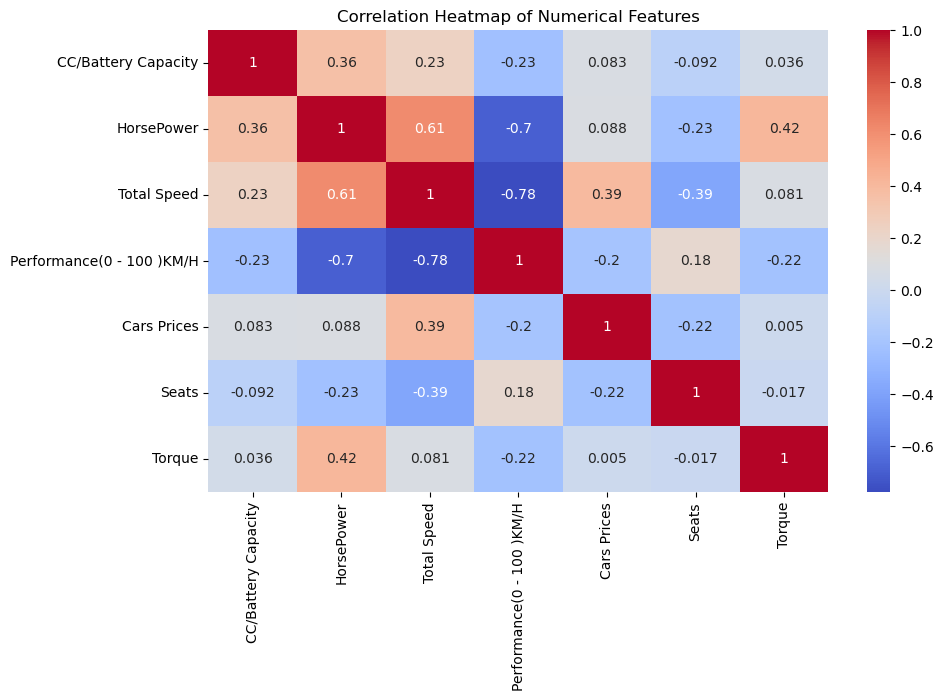

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(Data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Analysis of Correlation Heatmap of Numerical Features
- The heatmap displays the pairwise correlation coefficients between the numerical features in the dataset.

- Strong positive correlations (represented by warm colors like red and orange) exist between:

- HorsePower and Total Speed (0.61).

- HorsePower and Torque (0.42).

- Total Speed and HorsePower (0.61).

- Torque and HorsePower (0.42).

- Strong negative correlations (represented by cool colors like blue) are visible between:

- Total Speed and Performance(0 - 100 )KM/H (-0.78). This makes sense as a faster car (higher total speed) typically has a quicker acceleration time.

- Performance(0 - 100 )KM/H and Total Speed (-0.78).

- Other correlations, such as Cars Prices with CC/Battery Capacity (0.083), HorsePower (0.088), and Torque (0.005), are very weak, indicating that these features have a limited linear relationship with the price of a car. This suggests that other factors or a more complex model might be needed to accurately predict car prices.

# Step 2 Feature Engineering 

In [35]:
Data.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque', 'HorsePower_Unit',
       'CC/Battery Capacity_Unit', 'Total Speed_Unit',
       'Performance(0 - 100 )KM/H_Unit', 'Cars Prices_Unit', 'Torque_Unit'],
      dtype='object')

- Now we are Dropping the columns that are useless for our Model Training and Testing

In [36]:
Data = Data.drop(
    columns=[
        'Torque_Unit', 
        'HorsePower_Unit', 
        'CC/Battery Capacity_Unit', 
        'Performance(0 - 100 )KM/H_Unit', 
        'Cars Prices_Unit'], axis = 1)
Data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Total Speed_Unit
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,km
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,km
2,FORD,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,km
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,km
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,km


In [37]:
Data.drop(
    columns=[
        'Total Speed_Unit'
    ], axis = 1)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0
2,FORD,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,TOYOTA,Crown Signia,2.5L Hybrid I4,248.0,240.0,180.0,7.0,43590.0,Hybrid (Gas + Electric),5.0,239.0
1214,TOYOTA,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),239.0,326.0,180.0,6.0,50000.0,Hybrid,7.0,630.0
1215,TOYOTA,Corolla Cross,2.0L Gas / 2.0L Hybrid,198.0,169.0,190.0,8.0,25210.0,Gas / Hybrid,5.0,190.0
1216,TOYOTA,C-HR+,1.8L / 2.0L Hybrid,179.0,140.0,180.0,7.0,33000.0,Hybrid,5.0,190.0


In [38]:
Data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Total Speed_Unit
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,km
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,km
2,FORD,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,km
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,km
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,km


## Lets Audit what's inside this "Engines" column.This column has HUGE potential, but in its current form, it’s basically unusable for ML 🚫. We need feature engineering to turn it into something meaningful & predictive.

In [39]:
print(Data['Engines'].nunique())
print(Data['Engines'].value_counts().head(30))

356
Engines
I4                                 64
V12                                51
V6                                 39
Inline-4                           38
V8                                 34
Dual Electric Motors               23
Electric Motor                     20
2.0L Inline-4                      20
1.6L Inline-4                      19
5.6L V8                            17
5.3L V8 Gasoline                   16
3.0L Twin-Turbo Flat-6             15
Electric                           15
6.2L V8 Gasoline                   15
2.0L I4 Turbo                      15
2.0L Turbo I4                      14
1.8L Inline-4                      13
I4 Petrol                          12
3.6L V6 Gasoline                   12
I3                                 12
2.0L 4-Cylinder                    11
V10                                11
3.5L V6                            11
8.0L Quad-Turbo W16                10
4.0L Naturally Aspirated Flat-6    10
3.8L V6                             9


In [40]:
fuel_mask = Data['Engines'].str.contains(r'Diesel|Petrol|Gasoline|Hybrid|Electric|Plug-in', case=False, na = False)
print(Data.loc[fuel_mask, 'Engines'].sample(30))
print("Fuel-related rows:", fuel_mask.sum())


298                                Electric
602             3.0L Twin-Turbo V6 Gasoline
397                    1.5L Inline-4 Diesel
1079                      2.2L Diesel Turbo
695           6.2L Supercharged V8 Gasoline
675                  1.3L Turbo I4 Gasoline
574     2.9L Twin-Turbo V6 + Electric Motor
738            1.5L Turbo Inline-4 Gasoline
760                        6.2L V8 Gasoline
457                    2.8L Inline-6 Diesel
914                               V6 Petrol
1034                     3.3L V6 + Electric
685              3.6L V6 Pentastar Gasoline
327                    2.0L I4 Turbo Diesel
488                       1.5L Turbo Hybrid
652                    1.2L Revotron Petrol
1073                      3.2L Diesel Turbo
828                  1.6L 4-Cylinder Hybrid
237                       2.8L,TURBO,DIESEL
705            1.5L Turbo Inline-4 Gasoline
900                               I4 Petrol
894                   12.8L I6 Turbo Diesel
895                   12.8L I6 T

In [41]:
boost_mask = Data['Engines'].str.contains(r'Turbo|Supercharged', case=False, na=False)
print(Data.loc[boost_mask, 'Engines'].sample(30))
print("Boost-related rows:", boost_mask.sum())


432                      3.0L Twin-Turbo V6
632                1.2L Turbocharged Petrol
292                           2.0L Turbo I4
761                   1.5L Turbo 4-cylinder
892                   12.8L I6 Turbo Diesel
740            2.7L Turbo Inline-4 Gasoline
1141                      2.3L Turbocharged
382              1.0L Turbocharged Inline-3
822            1.6L Turbocharged 4-Cylinder
833     1.6L Hybrid Turbocharged 4-Cylinder
1073                      3.2L Diesel Turbo
954                   Inline-4 Turbocharged
326                           2.0L I4 Turbo
358                           2.0L I4 Turbo
865     1.6L Hybrid Turbocharged 4-Cylinder
592                    3.0L Turbocharged V6
538                           3.0L V6 Turbo
233               3.3L,V6,TWIN TURBO DIESEL
239                       2.8L,TURBO,DIESEL
602             3.0L Twin-Turbo V6 Gasoline
737            1.2L Turbo Inline-3 Gasoline
880                     8.0L Quad-Turbo W16
390                      3.0L Tw

In [42]:
special_mask = Data['Engines'].str.contains(r'Rotary|Wankel|Motor', case = False, na = False)
print(Data.loc[special_mask, 'Engines'].sample(30))
print('Special-related rows:', special_mask.sum())

848                                     Electric Motor
718                              Single Electric Motor
543                           4.0L V8 + Electric Motor
593                4.0L Twin-Turbo V8 + Electric Motor
558                               Dual Electric Motors
1196                            1.3L Wankel + Electric
562                               Dual Electric Motors
264                                     Electric Motor
812     Electric motors with up to 11,500 lb-ft torque
1191                            1.3L Inline-2 (Wankel)
362                     1.4L I4 Turbo + Electric Motor
854                                     Electric Motor
563                               Dual Electric Motors
933                              Electric (Dual Motor)
560                               Dual Electric Motors
664                                Tri Electric Motors
1212                         2.6L Wankel Rotary Engine
819     Electric motors with up to 11,500 lb-ft torque
1145      

## there are more feature candidates hiding inside Engines than just Fuel, Boost, and Special. If we don’t pull them out now, we’ll lose predictive power later (since Engines will stay as a messy text column).

## before we finalize the extraction logic, let’s scan the unique raw engine descriptions with .unique() or .value_counts() and check:

- Do we see displacement (2.0L)?

- Do we see configs like V6, Inline-4?

- Do we see horsepower figures (250 HP)?

## That way we know exactly which of the above variables are present and worth extracting.

In [43]:
import re

engines = Data['Engines'].astype(str)

patterns = {
    "Displacement_L": r"\d+(\.\d+)?L",                 # e.g. 1.5L, 3.0L
    "Cylinder_Count": r"\b\d{1,2}\b(?=-|cyl|Cyl)",     # e.g. 4, 6, 12
    "Cylinder_Layout": r"(Inline|V|W|Flat)",           # Inline, V, W, Flat
    "Horsepower": r"(\d+)\s?(HP|hp|bhp|PS|kW)",        # 250 HP, 300 bhp
    "Hybrid_Subtype": r"(Mild Hybrid|Plug-in Hybrid|Full Hybrid)", 
    "Aspiration_NA": r"(?i)\bNA\b|\bNaturally Aspirated\b"
}

Audit_result = {}
for name, pat in patterns.items():
    mask = engines.str.contains(pat, flags = re.IGNORECASE, regex=True)
    Audit_result[name]=mask.sum()

Audit_df = pd.DataFrame.from_dict(Audit_result, orient='index', columns=['Match_Count'])
print(Audit_df)

                 Match_Count
Displacement_L           757
Cylinder_Count            73
Cylinder_Layout          762
Horsepower                 0
Hybrid_Subtype             5
Aspiration_NA             13


C:\Users\91707\AppData\Local\Temp\ipykernel_19184\1130693154.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = engines.str.contains(pat, flags = re.IGNORECASE, regex=True)


In [44]:
engine_col = Data['Engines']

# Full Electric
electric_mask = engine_col.str.contains(r'Motor', case=False)
print(Data.loc[electric_mask, 'Engines'].sample(30))

# Hybrid
hybrid_mask = engine_col.str.contains(r'Hybrid', case=False)
print(Data.loc[hybrid_mask, 'Engines'].sample(30))

# Rotary / Wankel
rotary_mask = engine_col.str.contains(r'Rotary|Wankel', case=False)
print(Data.loc[rotary_mask, 'Engines'].sample(15))

# Boosted (Turbo/Supercharged)
boost_mask = engine_col.str.contains(r'Turbo|Supercharged', case=False)
print(Data.loc[boost_mask, 'Engines'].sample(30))

# ICE (classic combustion, fallback after filtering others)
ice_mask = ~(electric_mask | hybrid_mask | rotary_mask | boost_mask)
print(Data.loc[ice_mask, 'Engines'].sample(30))


563                               Dual Electric Motors
666                         Dual Electric Motors (AWD)
823                         Hybrid I4 + Electric Motor
576                4.0L Twin-Turbo V8 + Electric Motor
597                4.0L Twin-Turbo V8 + Electric Motor
770                                Dual-Motor Electric
829                                     Electric Motor
864                          Hybrid I4+ Electric Motor
684                               Dual Electric Motors
994                                     Electric Motor
256                                     Electric Motor
433                               Dual Electric Motors
917                              Electric (Dual Motor)
937                         I4 Petrol + Electric Motor
449                               Dual Electric Motors
598                               Dual Electric Motors
701                               Dual Electric Motors
562                               Dual Electric Motors
811       

In [45]:
print("Electric:", electric_mask.sum())
print("Hybrid:", hybrid_mask.sum())
print("Rotary:", rotary_mask.sum())
print("Boosted (not unique count, can overlap):", boost_mask.sum())
print("ICE fallback:", ice_mask.sum())

Electric: 99
Hybrid: 63
Rotary: 15
Boosted (not unique count, can overlap): 330
ICE fallback: 743


In [46]:
Data["Engines"].str.contains("Electric|Hybrid|Rotary|Wankel|Turbo|Supercharged", case=False, na=False).sum()


499

## So from above auditing we found out that The Engine feature is in messy texted format. so we decided to extract them and create another features related to them and place them there.

## Step 0 
- staging ( we are not mutating our raw  data yet. instead of we make a copy of our real dataset and create a dummy feature with removing spaces from those variables )

In [47]:
df = Data.copy()

df['Engine_clean'] = df['Engines'].astype(str).str.replace(r'\s+',' ', regex = True).str.strip()
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Total Speed_Unit,Engine_clean
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,km,V8
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,km,V12
2,FORD,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,km,1.2L Petrol
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,km,V8
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,km,V10


## Step 1
 - Displacements(liters)

In [48]:
df['Engine_Displacement_L'] = (
    df['Engine_clean'].str.extract(r'(\d+(?:\.\d+)?)\s*L', flags = re.IGNORECASE)[0].astype(float)
)

In [49]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Total Speed_Unit,Engine_clean,Engine_Displacement_L
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,km,V8,NaN
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,km,V12,NaN
2,FORD,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,km,1.2L Petrol,1.2
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,km,V8,NaN
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,km,V10,NaN


In [50]:
df["Engine_Displacement_L"].describe()

count    762.000000
mean       6.164987
std       40.203254
min        0.360000
25%        1.600000
50%        2.400000
75%        3.600000
max      500.000000
Name: Engine_Displacement_L, dtype: float64

### Step 2 — cylinder layout & cylinder count

- We’ll keep Cylinder_Count numeric (so models stay happy) and set 0 for Electric/Rotary.

In [51]:
def parse_layout(s : str):
    s = s.lower()
    if re.search(r'rotary|wankel',s): return "Rotary"
    if re.search(r'flat|boxer',s): return "Flat"
    if re.search(r'\bvr\s*\d',s): return "VR"
    if re.search(r'\bw\s*\d',s): return "W"
    if re.search(r'\bv\s*\d',s): return "V"
    if re.search(r'inline\b|\bi\s*[- ]?\d',s): return "Inline"
    if re.search(r'electric|motor',s): return "Electric"
    return np.nan

def parse_cyl_count(s: str):
    s = s.lower()
    if re.search(r'rotary|motor|electric|wankel',s): return 0
    for pat in [r'\bvr\s*-?\s*(\d+)', r'\bw\s*-?\s*(\d+)', r'\bv\s*-?\s*(\d+)',
                r'(?:flat|boxer)\s*-?\s*(\d+)', r'(?:inline|i)\s*-?\s*(\d+)']:
        m = re.search(pat, s)
        if m: return int(m.group(1))
    m = re.search(r'(\d+)\s*[- ]?\s*(?:cyl|cylinder)',s)
    if m: return int(m.group(1))
    return np.nan

df['Engine_layout'] = df['Engine_clean'].apply(parse_layout)
df['Engine_Cylinder_count'] = df['Engine_clean'].apply(parse_cyl_count)


In [52]:
df['Engine_layout'].value_counts(dropna = False).head(10)
df['Engine_Cylinder_count'].value_counts(dropna = False).head(10)

Engine_Cylinder_count
4.0     414
6.0     263
8.0     149
0.0     139
NaN     123
3.0      55
12.0     52
10.0     11
16.0     10
2.0       2
Name: count, dtype: int64

### Step 3 - aspiration(Turbo / supercharged /NA)
- We normalize Variants (Twin/bi/quad) and keep a neutral "None" when nothing is stated

In [53]:
def parse_aspiration(s: str):
    s = s.lower()
    if re.search(r'quad[-\s]? turbo', s): return "Quad Turbo"
    if re.search(r'twin|bi[-/s]?turbo', s): return "Twin Turbo"
    if re.search(r'\bsupercharged\b', s): return "SuperCharged"
    if re.search(r'\bturbo\b', s): return "Turbo"
    if re.search(r'naturally aspirated|\bna\b', s): return "Naturally Aspirated"
    return "None"
df['Engine_Aspiration'] = df['Engine_clean'].apply(parse_aspiration)
df['Engine_Aspiration'].sample(50)

870                    None
350                    None
249                    None
24                     None
298                    None
442                    None
819                    None
1107                   None
339                   Turbo
7                      None
310                   Turbo
205                    None
25                     None
386                    None
281                   Turbo
984                    None
744                    None
135                    None
76                     None
682                   Turbo
1171                   None
777                   Turbo
1068                   None
671                    None
1045    Naturally Aspirated
1116                   None
313                    None
839                    None
275                   Turbo
1109                   None
898                   Turbo
935                    None
512                    None
92                     None
877                    None
724                 

In [54]:
df['Fuel Types'].unique()

array(['plug in hyrbrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Petrol/Diesel', 'Plug-in Hybrid', 'Petrol/AWD', 'Petrol/Hybrid',
       'Hydrogen', 'Diesel/Petrol', 'Petrol/EV', 'Hybrid/Electric',
       'Petrol, Hybrid', 'Petrol, Diesel', 'Hybrid (Petrol)',
       'CNG/Petrol', 'Hybrid/Petrol', 'Diesel Hybrid', 'Petrol (Hybrid)',
       'Hybrid (Gas + Electric)', 'Gas / Hybrid', 'Hybrid / Plug-in'],
      dtype=object)

### As we are seeing that our fuel type is very messy too. so we need to normalize the fuel type feature

In [55]:
def normalize_fuel_type(s: str):
    if pd.isna(s): return np.nan
    s = s.lower()
    if re.search(r'plug[-\s]*in.*hybrid|plug in hybrid|plug in hyrbrid',s) : return "Plug-in Hybrid"
    if 'hybrid' in s : return "Hybrid"
    if 'electric' in s or re.search(r'\b(ev|evs|ev-only|electric only|electric)\b', s): return "Electric"
    if 'petrol' in s or 'gas' in s: return "Petrol"
    if 'diesel' in s: return "Diesel"
    if 'cng' in s : return "CNG"
    if 'hydrogen' in s : return "Hydrogen"
    return "Other"

df['Fuel_Types_Normalized'] = df['Fuel Types'].apply(normalize_fuel_type)
df['Fuel_Types_Normalized'].unique()
df.head(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Total Speed_Unit,Engine_clean,Engine_Displacement_L,Engine_layout,Engine_Cylinder_count,Engine_Aspiration,Fuel_Types_Normalized
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,km,V8,NaN,V,8.0,None,Plug-in Hybrid
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,km,V12,NaN,V,12.0,None,Petrol
2,FORD,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,km,1.2L Petrol,1.2,NaN,NaN,None,Petrol
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,km,V8,NaN,V,8.0,None,Petrol
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,km,V10,NaN,V,10.0,None,Petrol
5,BMW,Mclaren 720s,V8,3994.0,710.0,341.0,2.0,499000.0,Petrol,2.0,770.0,km,V8,NaN,V,8.0,None,Petrol
6,ASTON MARTIN,VANTAGE F1,V8,3982.0,656.0,314.0,3.0,193440.0,Petrol,2.0,685.0,km,V8,NaN,V,8.0,None,Petrol
7,BENTLEY,Continental GT Azure,V8,3996.0,550.0,318.0,4.0,311000.0,Petrol,4.0,900.0,km,V8,NaN,V,8.0,None,Petrol
8,LAMBORGHINI,VENENO ROADSTER,V12,6498.0,750.0,356.0,2.0,4500000.0,Petrol,2.0,690.0,km,V12,NaN,V,12.0,None,Petrol
9,FERRARI,F8 TRIBUTO,V8,3900.0,710.0,340.0,2.0,280000.0,Petrol,2.0,770.0,km,V8,NaN,V,8.0,None,Petrol


In [56]:
df['Fuel_Types_Normalized'].unique()

array(['Plug-in Hybrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Hydrogen'], dtype=object)

### Step 5 — motor count (EV / hybrid context)

- We’ll map words (single/dual/tri/quad) and numeric patterns.

In [57]:
Word2Num = {
    'single':1,
    'dual':2,
    'tri':3,
    'triple':3,
    'quad':4,
    'quadruple':4
}

def parse_motor_count(s: str):
    s = s.lower()
    for w, n in Word2Num.items():
        if re.search(rf'\b{w}\b.*\bmotors?\b', s): return n
    m = re.search(r'(\d+)\s*(?:motor|motors)', s)
    if m: return int(m.group(1))
    return np.nan

df['Engine_Motor_Count'] = df['Engine_clean'].apply(parse_motor_count).astype('float')
df['Engine_Motor_Count'].value_counts(dropna = False)

Engine_Motor_Count
NaN    1173
2.0      33
1.0       8
3.0       3
4.0       1
Name: count, dtype: int64

In [58]:
df[['Engine_clean', 'Engine_Motor_Count']].sample(20)

,Engine_clean,Engine_Motor_Count
1196,1.3L Wankel + Electric,NaN
253,1.6L PETROL,NaN
1209,1.3L Wankel Rotary Engine,NaN
31,V8,NaN
44,V10,NaN
1067,1.2L MIVEC,NaN
223,"1.4L,4-CYLINDER,INLINE-4(I4)",NaN
673,2.4L I4 Tigershark Gasoline,NaN
928,I4 Petrol,NaN
998,Hybrid I4,NaN


In [59]:
df[df["Engine_clean"].str.contains(r'(Single|Dual|Tri|Quad)', case=False, na=False)]['Engine_clean'].value_counts()

C:\Users\91707\AppData\Local\Temp\ipykernel_19184\2169610206.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Engine_clean"].str.contains(r'(Single|Dual|Tri|Quad)', case=False, na=False)]['Engine_clean'].value_counts()


Engine_clean
Dual Electric Motors                              23
Electric Motor                                    20
Electric                                          15
8.0L Quad-Turbo W16                               10
Single Electric Motor                              6
ELECTRIC MOTOR                                     5
Electric (Dual Motor)                              5
Electric motors with up to 11,500 lb-ft torque     5
Hybrid I4 + Electric Motor                         4
1.4L I4 Turbo + Electric Motor                     4
4.0L Twin-Turbo V8 + Electric Motor                3
Dual Electric Motors (AWD)                         3
ELECTRIC                                           3
Tri Electric Motors                                3
I4 + ELECTRIC                                      3
3.0L V6 + Electric Motor                           2
4.0L V8 + Electric Motor                           2
Dual-Motor Electric                                2
2.9L V6 + Electric Motor         

## As upto now we extract and place many important Data from features to features. We additionally created [Engine_Displacement_L,	Engine_layout,	Engine_Cylinder_count,	Engine_Aspiration,	Fuel_Types_Normalized] and also make a copy column of [Engine Types] is [Engine_clean]

In [60]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Total Speed_Unit,Engine_clean,Engine_Displacement_L,Engine_layout,Engine_Cylinder_count,Engine_Aspiration,Fuel_Types_Normalized,Engine_Motor_Count
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,km,V8,NaN,V,8.0,None,Plug-in Hybrid,NaN
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,km,V12,NaN,V,12.0,None,Petrol,NaN
2,FORD,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,km,1.2L Petrol,1.2,NaN,NaN,None,Petrol,NaN
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,km,V8,NaN,V,8.0,None,Petrol,NaN
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,km,V10,NaN,V,10.0,None,Petrol,NaN


### Step 7 — consistency passes 

- For pure Electric rows (use my existing Fuel Types), force displacement and cylinders to 0.

- For Rotary, we already set count to 0; layout = Rotary is kept.

In [61]:
fuel_col = 'Fuel_Types_Normalized'
is_electric = df[fuel_col].str.contains('electric', case=False, na=False)
is_rotary = df['Engine_layout'].eq('Rotary')

df.loc[is_electric, ['Engine_Displacement_L', 'Engine_Cylinder_count']] = 0
df.loc[is_rotary, 'Engine_Cylinder_count'] = 0

- Quick Sanity Check

In [62]:
print("Electric rows (fuel col): ", is_electric.sum())
print("Rotary rows (engine layout): ", is_rotary.sum())
print("Turbo Rows (Aspiration Contains Turbo): ", df['Engine_Aspiration'].str.contains('Turbo', case=False, na=False).sum())

Electric rows (fuel col):  98
Rotary rows (engine layout):  15
Turbo Rows (Aspiration Contains Turbo):  264


In [63]:
print(df.loc[is_electric, ['Engine_Displacement_L','Engine_Cylinder_count']].head(10))
print(df.loc[is_rotary,   ['Engine_layout','Engine_Cylinder_count']].head(10))


     Engine_Displacement_L  Engine_Cylinder_count
97                     0.0                    0.0
139                    0.0                    0.0
140                    0.0                    0.0
216                    0.0                    0.0
245                    0.0                    0.0
248                    0.0                    0.0
251                    0.0                    0.0
253                    0.0                    0.0
256                    0.0                    0.0
262                    0.0                    0.0
     Engine_layout  Engine_Cylinder_count
1145        Rotary                    0.0
1146        Rotary                    0.0
1147        Rotary                    0.0
1155        Rotary                    0.0
1158        Rotary                    0.0
1184        Rotary                    0.0
1185        Rotary                    0.0
1186        Rotary                    0.0
1187        Rotary                    0.0
1191        Rotary            

In [64]:
df.head(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Total Speed_Unit,Engine_clean,Engine_Displacement_L,Engine_layout,Engine_Cylinder_count,Engine_Aspiration,Fuel_Types_Normalized,Engine_Motor_Count
0,FERRARI,SF90 STRADALE,V8,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,km,V8,NaN,V,8.0,None,Plug-in Hybrid,NaN
1,ROLLS ROYCE,PHANTOM,V12,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,km,V12,NaN,V,12.0,None,Petrol,NaN
2,FORD,KA+,1.2L Petrol,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,km,1.2L Petrol,1.2,NaN,NaN,None,Petrol,NaN
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,km,V8,NaN,V,8.0,None,Petrol,NaN
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,km,V10,NaN,V,10.0,None,Petrol,NaN
5,BMW,Mclaren 720s,V8,3994.0,710.0,341.0,2.0,499000.0,Petrol,2.0,770.0,km,V8,NaN,V,8.0,None,Petrol,NaN
6,ASTON MARTIN,VANTAGE F1,V8,3982.0,656.0,314.0,3.0,193440.0,Petrol,2.0,685.0,km,V8,NaN,V,8.0,None,Petrol,NaN
7,BENTLEY,Continental GT Azure,V8,3996.0,550.0,318.0,4.0,311000.0,Petrol,4.0,900.0,km,V8,NaN,V,8.0,None,Petrol,NaN
8,LAMBORGHINI,VENENO ROADSTER,V12,6498.0,750.0,356.0,2.0,4500000.0,Petrol,2.0,690.0,km,V12,NaN,V,12.0,None,Petrol,NaN
9,FERRARI,F8 TRIBUTO,V8,3900.0,710.0,340.0,2.0,280000.0,Petrol,2.0,770.0,km,V8,NaN,V,8.0,None,Petrol,NaN


## As we extracted every important data from Engines column so we drop "Engines", "Engine_clean" columns as we have much more structured features in our Dataset. We also forgot to drop the "Total Speed_Unit" feature so we are going to drop this too.

In [65]:
df.drop(columns=['Engine_clean', 'Total Speed_Unit','Engines'], inplace=True)
df.head()

,Company Names,Cars Names,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Engine_Displacement_L,Engine_layout,Engine_Cylinder_count,Engine_Aspiration,Fuel_Types_Normalized,Engine_Motor_Count
0,FERRARI,SF90 STRADALE,399.0,963.0,340.0,2.0,1100000.0,plug in hyrbrid,2.0,800.0,NaN,V,8.0,None,Plug-in Hybrid,NaN
1,ROLLS ROYCE,PHANTOM,674.0,563.0,250.0,5.0,460000.0,Petrol,5.0,900.0,NaN,V,12.0,None,Petrol,NaN
2,FORD,KA+,1200.0,70.0,165.0,10.0,12000.0,Petrol,5.0,100.0,1.2,NaN,NaN,None,Petrol,NaN
3,MERCEDES,GT 63 S,3982.0,630.0,250.0,3.0,161000.0,Petrol,4.0,900.0,NaN,V,8.0,None,Petrol,NaN
4,AUDI,AUDI R8 Gt,5204.0,602.0,320.0,3.0,253290.0,Petrol,2.0,560.0,NaN,V,10.0,None,Petrol,NaN


## Now Let's Create a ML model which Predict Car prices Based on it's features

### Splitting the dataset into Independent and Dependent Features

In [66]:
X = df.drop("Cars Prices", axis=1)
y = df["Cars Prices"]

In [67]:
print(df["Cars Prices"].isna().sum())


1


In [68]:
df["Cars Prices"].fillna(df["Cars Prices"].median(), inplace=True)


In [69]:
X.drop(columns=['Fuel Types'], inplace=True)

In [70]:
X.head()

,Company Names,Cars Names,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Seats,Torque,Engine_Displacement_L,Engine_layout,Engine_Cylinder_count,Engine_Aspiration,Fuel_Types_Normalized,Engine_Motor_Count
0,FERRARI,SF90 STRADALE,399.0,963.0,340.0,2.0,2.0,800.0,NaN,V,8.0,None,Plug-in Hybrid,NaN
1,ROLLS ROYCE,PHANTOM,674.0,563.0,250.0,5.0,5.0,900.0,NaN,V,12.0,None,Petrol,NaN
2,FORD,KA+,1200.0,70.0,165.0,10.0,5.0,100.0,1.2,NaN,NaN,None,Petrol,NaN
3,MERCEDES,GT 63 S,3982.0,630.0,250.0,3.0,4.0,900.0,NaN,V,8.0,None,Petrol,NaN
4,AUDI,AUDI R8 Gt,5204.0,602.0,320.0,3.0,2.0,560.0,NaN,V,10.0,None,Petrol,NaN


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

# Handling Categorical Columns Via One hot Encoding
- Here we will perform OHE to the all categorical Features on training and testing dataset
- As we are using pd.get_dummies so now the encoded features will have false and true values instead of 0 and 1 values
- So we convert those boolean features into integers
- And Fill the remaining NaN values to 0.

In [72]:
numeric_cols = ["CC/Battery Capacity", "HorsePower", "Total Speed", 
                "Performance(0-100)KM/H", "Seats", "Torque", 
                "Engine_Displacement_L", "Engine_Cylinder_count", "Engine_Motor_Count"]

categorical_cols = ["Company Names", "Cars Names", "Engine_layout", "Engine_Aspiration", "Fuel_Types_Normalized"]


In [73]:
import pandas as pd

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns (in case some categories are missing in test set)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [74]:
X_train_encoded.fillna(0, inplace=True)
X_test_encoded.fillna(0, inplace=True)


In [75]:
# Convert only boolean columns to integers
for df_ in [X_train_encoded, X_test_encoded]:
	bool_cols = df_.select_dtypes(include='bool').columns
	df_[bool_cols] = df_[bool_cols].astype(int)


In [76]:
X_train_encoded.head()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Seats,Torque,Engine_Displacement_L,Engine_Cylinder_count,Engine_Motor_Count,Company Names_ASTON MARTIN,Company Names_AUDI,Company Names_BENTLEY,Company Names_BMW,Company Names_BUGATTI,Company Names_CADILLAC,Company Names_CHEVROLET,Company Names_FERRARI,Company Names_FORD,Company Names_GMC,Company Names_HONDA,Company Names_HYUNDAI,Company Names_JAGUAR LAND ROVER,Company Names_JEEP,Company Names_KIA,Company Names_LAMBORGHINI,Company Names_MAHINDRA,Company Names_MARUTI SUZUKI,Company Names_MAZDA,Company Names_MERCEDES,Company Names_MITSUBISHI,Company Names_NISSAN,Company Names_PEUGEOT,Company Names_PORSCHE,Company Names_ROLLS ROYCE,Company Names_TATA MOTORS,Company Names_TESLA,Company Names_TOYOTA,Company Names_VOLKSWAGEN,Company Names_VOLVO,Cars Names_100NX,Cars Names_114D SPORT LINE,Cars Names_114i,Cars Names_116D,Cars Names_116D ADVANTAGE,Cars Names_116D EFFICIENTDYNAMICS,Cars Names_116i,Cars Names_116i EFFICIENTDYNAMICS,Cars Names_118i,Cars Names_118i M SPORT,Cars Names_118i SHADOW LINE,Cars Names_118i URBAN LINE,Cars Names_118i XDRIVE,Cars Names_1200,Cars Names_120D XDRIVE,Cars Names_120i M SPORT,Cars Names_120i XDRIVE,Cars Names_121,Cars Names_125D,Cars Names_125i,Cars Names_128ti,Cars Names_1500,Cars Names_180SX,Cars Names_2008,Cars Names_2008 Active,Cars Names_2008 Allure,Cars Names_200SX,Cars Names_208,Cars Names_208 Allure Premium,Cars Names_208 PSE (Peugeot Sport Engineered),Cars Names_208 Sedan,Cars Names_280ZX,Cars Names_3008,Cars Names_3008 Active,Cars Names_3008 Allure,Cars Names_3008 GT Hybrid,Cars Names_3008 GT Line,Cars Names_3008 PSE,Cars Names_3008 Plug-In Hybrid,Cars Names_300ZX,Cars Names_300ZX Turbo,Cars Names_301 Sedan,Cars Names_308 Allure,Cars Names_308 GTI,Cars Names_308 PSE,Cars Names_308 Saloon,Cars Names_330i,Cars Names_370Z NISMO,Cars Names_370Z Roadster,Cars Names_430i COUPE,Cars Names_4RUNNER,Cars Names_4Runner (6th Gen),Cars Names_5008,Cars Names_5008 Active,Cars Names_5008 Allure,Cars Names_5008 Allure Premium,Cars Names_5008 GT Line,Cars Names_508,Cars Names_508 Allure,Cars Names_508 Hybrid4,Cars Names_508 PSE (Peugeot Sport Engineered),Cars Names_508 Plug-In Hybrid,Cars Names_508 Saloon,Cars Names_626,Cars Names_718 Boxster,Cars Names_718 Boxster GTS,Cars Names_718 Boxster T,Cars Names_718 Cayman,Cars Names_718 Cayman GT4 RS,Cars Names_718 Cayman S,Cars Names_718 Spyder,Cars Names_787B (Race Car),Cars Names_818,Cars Names_911 Carrera 4,Cars Names_911 Carrera 4 GTS,Cars Names_911 Carrera Base,Cars Names_911 Carrera S Cabriolet,Cars Names_911 Dakar,Cars Names_911 Dakar Sport,Cars Names_911 GT2 RS,Cars Names_911 GT3,Cars Names_911 GT3 Cup,Cars Names_911 GT3 RS,Cars Names_911 GT3 RS Clubsport,Cars Names_911 GT3 Touring,Cars Names_911 GT4 RS,Cars Names_911 RSR (Motorsport Edition),Cars Names_911 Sport Turismo,Cars Names_911 Targa 4,Cars Names_911 Targa 4 GTS,Cars Names_911 Targa 4 Lightweight,Cars Names_911 Turbo,Cars Names_911 Turbo Cabriolet,Cars Names_911 Turbo Exclusive Series,Cars Names_911 Turbo S,Cars Names_911 Turbo S Coupe,Cars Names_929,Cars Names_A4,Cars Names_A5 COUPE,Cars Names_A7,Cars Names_A8,Cars Names_ACCORD,Cars Names_AD Wagon,Cars Names_ALPHARD EXECUTIVE LOUNGE,Cars Names_ALTIMA,Cars Names_ASX (Outlander Sport),Cars Names_ASX Dynamic,Cars Names_ASX Exceed,Cars Names_AUDI R8 Gt,Cars Names_AVALON,Cars Names_AVENTADOR LP 780-4 ULTIMATE ROADSTER,Cars Names_AVENTADOR SV,Cars Names_AVENTADOR SVJ XAGO,Cars Names_AZ-Offroad,Cars Names_Acadia AT4,Cars Names_Acadia Black Edition,Cars Names_Acadia Denali,Cars Names_Acadia Denali Ultimate,Cars Names_Acadia SLE,Cars Names_Airtrek,Cars Names_Almera,Cars Names_Almera Tino,Cars Names_Altroz,Cars Names_Altroz CNG,Cars Names_Altroz iTurbo,Cars Names_Amarok,Cars Names_Aria,Cars Names_Ariya,Cars Names_Ariya E-4ORCE,Cars Names_Ariya Empower+,Cars Names_Ariya Lounge Edition,Cars Names_Ariya Premiere,Cars Names_Armada,Cars Names_Armada Platinum,Cars Names_Arteon,Cars Names_Arteon R-L

In [77]:
print(X_train_encoded.dtypes.value_counts())
# Find which column is object type
print(X_train_encoded.dtypes[X_train_encoded.dtypes == 'object'])



int32      948
float64      9
Name: count, dtype: int64
Series([], dtype: object)


## Model Creation and Model Training
- Algorithm used - Random Forest Regreesion

In [78]:
from sklearn.ensemble import RandomForestRegressor
Model = RandomForestRegressor(n_estimators=100, random_state=42)
Model.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

### Let's do some Hyper Parameter Tuning with it

In [79]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators':[100,200],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap':[True],
    'oob_score':[True]
}
Model_CV = GridSearchCV(Model, parameters, cv=3, n_jobs=-1)
Model_CV.fit(X_train_encoded, y_train)

print("Best params: " ,Model_CV.best_params_)
print("Best score: ", Model_CV.best_score_)

Best params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True}
Best score:  0.5613197920146555


### Here we get our best parameters for our model so let's train our model with those parameters again

In [80]:
best_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

best_model.fit(X_train_encoded, y_train)

RandomForestRegressor(max_depth=10, oob_score=True, random_state=42)

## Testing and Evaluation

In [81]:
y_pred = best_model.predict(X_test_encoded)
# y_pred

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("OOB R2 score:", best_model.oob_score_)

MAE: 19974.27207327118
MSE: 3666180496.348234
R2: 0.9136802176132448
OOB R2 score: 0.47749856170258953


### So we go a Nice prediction score here. The Out-of-Bag (OOB) R2score of approximately 0.48 also provides a good measure of the model's generalization performance during training.

# NOW THE MODEL WILL TALK
- Here we implemented a command-line interface (CLI) that allows users to input various car specifications and get a predicted price, making our model practical and easy to use.

In [83]:
training_columns = X_train_encoded.columns

def preprocess_user_input(user_input_dict, training_columns):
    user_df = pd.DataFrame([user_input_dict])
    user_df = pd.get_dummies(user_df)
    
    user_df = user_df.reindex(columns=training_columns, fill_value=0)
    
    # Ensure categorical dummies are int, keep numeric as float
    for col in user_df.columns:
        if user_df[col].dtype == "bool":
            user_df[col] = user_df[col].astype(int)


    
    return user_df



In [86]:
def main():
    print("🚗 Welcome To Car Price Prediction Model (type 'exit' anytime to quit)\n")

    while True:
        user_input = {}
        
        company = input("Company Name: ")
        if company.lower() == "exit": break
        user_input["Company Names"] = company

        car = input("Car Name: ")
        if car.lower() == "exit": break
        user_input["Cars Names"] = car

        layout = input("Engine Layout (e.g., I4, V6): ")
        if layout.lower() == "exit": break
        user_input["Engine_layout"] = layout

        aspiration = input("Engine Aspiration (None, Turbo, SuperCharged): ")
        if aspiration.lower() == "exit": break
        user_input["Engine_Aspiration"] = aspiration

        fuel = input("Fuel Type (Petrol, Diesel, Electric, Hybrid): ")
        if fuel.lower() == "exit": break
        user_input["Fuel_Types_Normalized"] = fuel

        try:
            user_input["CC/Battery Capacity"] = float(input("CC/Battery Capacity: "))
            user_input["HorsePower"] = float(input("HorsePower: "))
            user_input["Total Speed"] = float(input("Total Speed: "))
            user_input["Performance(0-100)KM/H"] = float(input("0-100 KM/H Performance: "))
            user_input["Seats"] = int(input("Number of Seats: "))
            user_input["Torque"] = float(input("Torque: "))
            user_input["Engine_Displacement_L"] = float(input("Engine Displacement (L): "))
            user_input["Engine_Cylinder_count"] = int(input("Number of Cylinders: "))
            user_input["Engine_Motor_Count"] = int(input("Motor Count: "))
        except ValueError:
            print("⚠️ Invalid input detected. Please enter numeric values where required.\n")
            continue
        
        # Preprocess user input
        user_df = preprocess_user_input(user_input, training_columns)
        
        # Predict
        predicted_price = best_model.predict(user_df)
        print(f"\n💰 Predicted Car Price: {predicted_price[0]:,.2f}\n")
        print("------------------------------------------------------\n")


In [93]:
main()

🚗 Welcome To Car Price Prediction Model (type 'exit' anytime to quit)

